In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [3]:
y.index = y.name

In [4]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [5]:
y.index = pd.to_datetime(y.index)

In [6]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [7]:
from pytrends.request import TrendReq

In [96]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession", "Samsung","Interest Rates","New Phone", "Buy iPhone","Sell iPhone", 
            "bath bomb", "Snow Man Band", "Yellow Duck"]
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [97]:
df = df.resample("Q").mean()
X = df

In [98]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [102]:
from sklearn.linear_model import Lasso

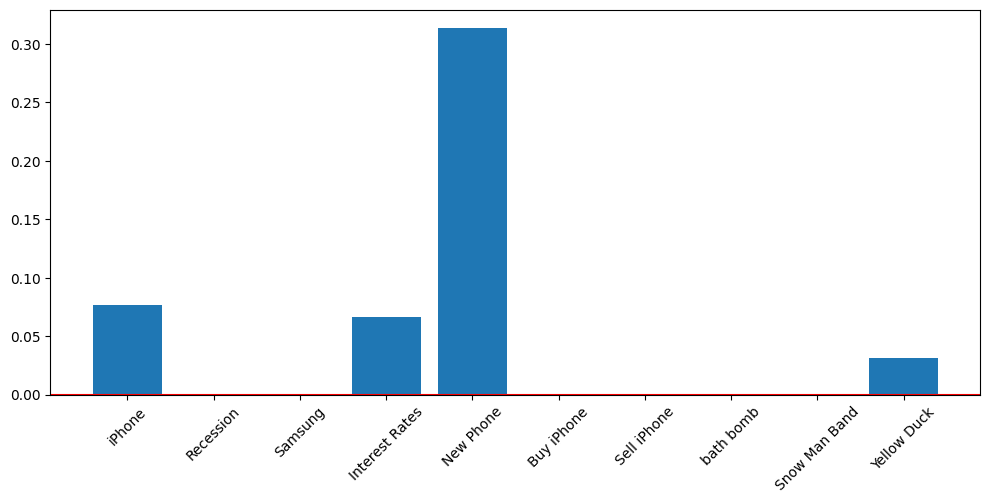

In [109]:
lasso = Lasso(alpha=.03)   # 0.5 cannot work, change lambda = 0.03
lasso.fit(X_scaled,y)
coefficients = lasso.coef_
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)), coefficients, tick_label = X.columns)
plt.xticks(rotation=45)
plt.axhline(0, color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

I would like to say that these coefficient magnitudes make sense because we have scaled our X (displayed in x axis). For example, a large positive magnitudes in $New Pohone$ suggests that Apple's EPS may go up when there are news on new iphone release. And the relatively small magnitudes in coefficients for $Phone$ and $Interest Rates$ mean they have positive relationship but not strong with Apple's EPS.

Meanwhile, there are some coefficients, such as $Recession$ and $Samsung$, are shrunk to 0, suggesting that these factors may not be relative with Apple's EPS.

However, these is a positive magnitude in $Yellow Duck$, which does not make much sense when the coefficients for $Recession$ has been reduced to 0. This magnitude may need to be dealt with carefully and caused by small penalty setting ($\lambda$ = 0.03). 